# Predicting Car Selling Price

## Data Preparation and Cleaning

In [1]:
# Importing essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

car_data = pd.read_csv('Car details v3.csv')

# Display the first few rows of the dataset and its summary information

car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [2]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Data transformations

In [3]:
# Extract the brand name and exclude the model

car_data['name'] = car_data['name'].astype(str).str.split().str[0]
car_data['name'] = car_data['name'].astype('category')


# Extract the numeric part and convert to float

car_data['engine'] = car_data['engine'].astype(str).str.split().str[0]
car_data['engine'] = car_data['engine'].astype(float)

car_data['mileage'] = car_data['mileage'].astype(str).str.split().str[0]
car_data['mileage'] = car_data['mileage'].astype(float)

car_data['max_power'] = car_data['max_power'].astype(str).str.extract('(\d+\.\d+|\d+)').astype(float)

### Feature Engineering

In [4]:
# Create 'car_age' feature from 'year' column

import datetime

car_data["car_age"] = (datetime.datetime.now().year) - (car_data["year"])

In [5]:
car_data.drop(["year", "torque"], axis = 1, inplace = True)

In [6]:
car_data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,10
1,Skoda,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,10
2,Honda,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,18
3,Hyundai,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,14
4,Maruti,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,17


### Handling Null Values

In [7]:
# Check whether there are null values in the dataset
car_data.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
car_age            0
dtype: int64

In [8]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage,7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7912.0,91.517919,35.822499,0.0,68.05,82.0,102.00,400.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0
car_age,8128.0,10.195989,4.044249,4.0,7.00,9.0,13.00,41.0


In [9]:
# Fill null values of numeric data with the median

num_data = [column for column in car_data.select_dtypes(["int", "float"])]
catg_data = [column for column in car_data.select_dtypes(exclude = ["int", "float"])]

for col in num_data:
    car_data[col].fillna(car_data[col].median(), inplace = True)
        
# Replace missing values in each categorical column with the most frequent value

for col in catg_data:
    car_data[col].fillna(car_data[col].value_counts().index[0], inplace = True)

# Checking to see if all null values have successfully been filled

car_data.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
car_age          0
dtype: int64

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           8128 non-null   category
 1   selling_price  8128 non-null   int64   
 2   km_driven      8128 non-null   int64   
 3   fuel           8128 non-null   object  
 4   seller_type    8128 non-null   object  
 5   transmission   8128 non-null   object  
 6   owner          8128 non-null   object  
 7   mileage        8128 non-null   float64 
 8   engine         8128 non-null   float64 
 9   max_power      8128 non-null   float64 
 10  seats          8128 non-null   float64 
 11  car_age        8128 non-null   int64   
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 707.9+ KB


## Exploratory Data Analysis and Visualisation

### Correlation Matrix

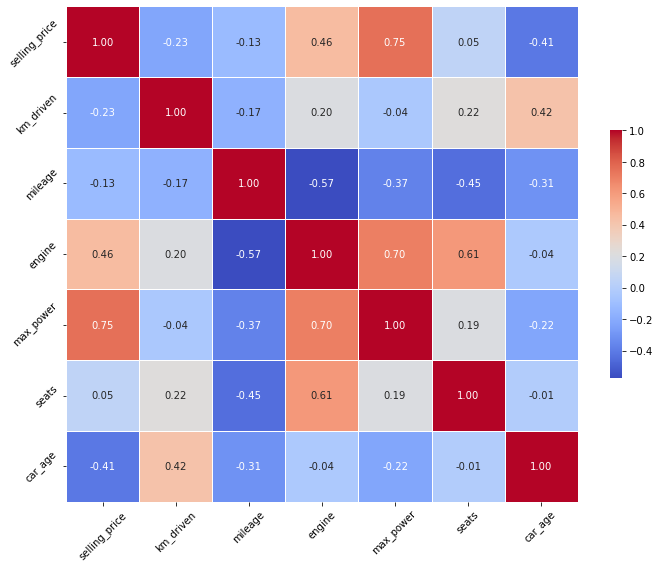

In [11]:
# Compute the correlation matrix

corr = car_data.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure

plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

# Adjust the layout

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()


#### Key Observations:

##### Selling Price and Engine
Correlation: 0.46

Inference: Larger engine sizes are moderately associated with higher selling prices.

##### Selling Price and Max Power
Correlation: 0.75

Inference: Cars with higher maximum power output tend to have higher selling prices.

##### Mileage and Engine
Correlation: -0.57

Inference: There is a strong inverse relationship; larger engines generally have lower fuel efficiency.

##### Mileage and Max Power
Correlation: -0.37

Inference: More powerful cars might be less fuel-efficient.

##### Engine and Max Power
Correlation: 0.70

Inference: A strong relationship exists where larger engines usually produce more power.

##### Car Age and Selling Price
Correlation: -0.41

Inference: Newer cars (lower age) are likely to be sold at higher prices.

##### Selling Price and Km Driven
A weak negative correlation (-0.23) implies a slight tendency for cars with higher mileage to sell for less.

### Box Plots

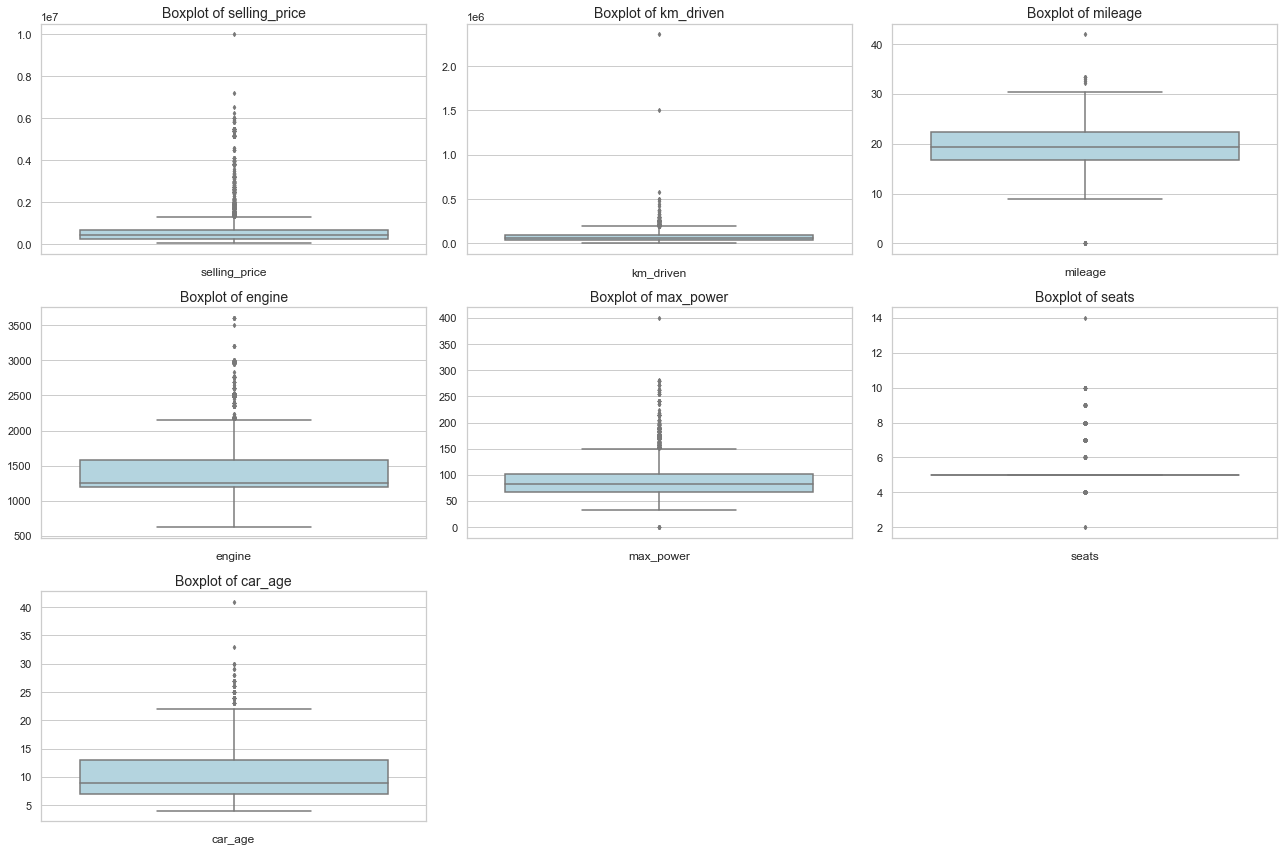

In [12]:
# Set aesthetic parameters in one step
sns.set(style="whitegrid")

# List of variables to plot
variables = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car_age']

# Setup the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Adjust the grid layout based on the number of variables
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create a boxplot for each variable
for i, variable in enumerate(variables):
    sns.boxplot(data=car_data, y=variable, ax=axes[i], color='lightblue', fliersize=3, linewidth=1.5)
    axes[i].set_title(f'Boxplot of {variable}', fontsize=14)
    axes[i].set_xlabel(variable, fontsize=12)
    axes[i].set_ylabel('')  # Remove y-label if it is redundant

# Hide any unused axes if there are any
for ax in axes[len(variables):]:
    ax.set_visible(False)

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()



The boxplots collectively provide a visual summary of the central tendency, dispersion, and skewness of the data and help to highlight outliers, which are individual values that fall outside of the interquartile range.

### Histograms

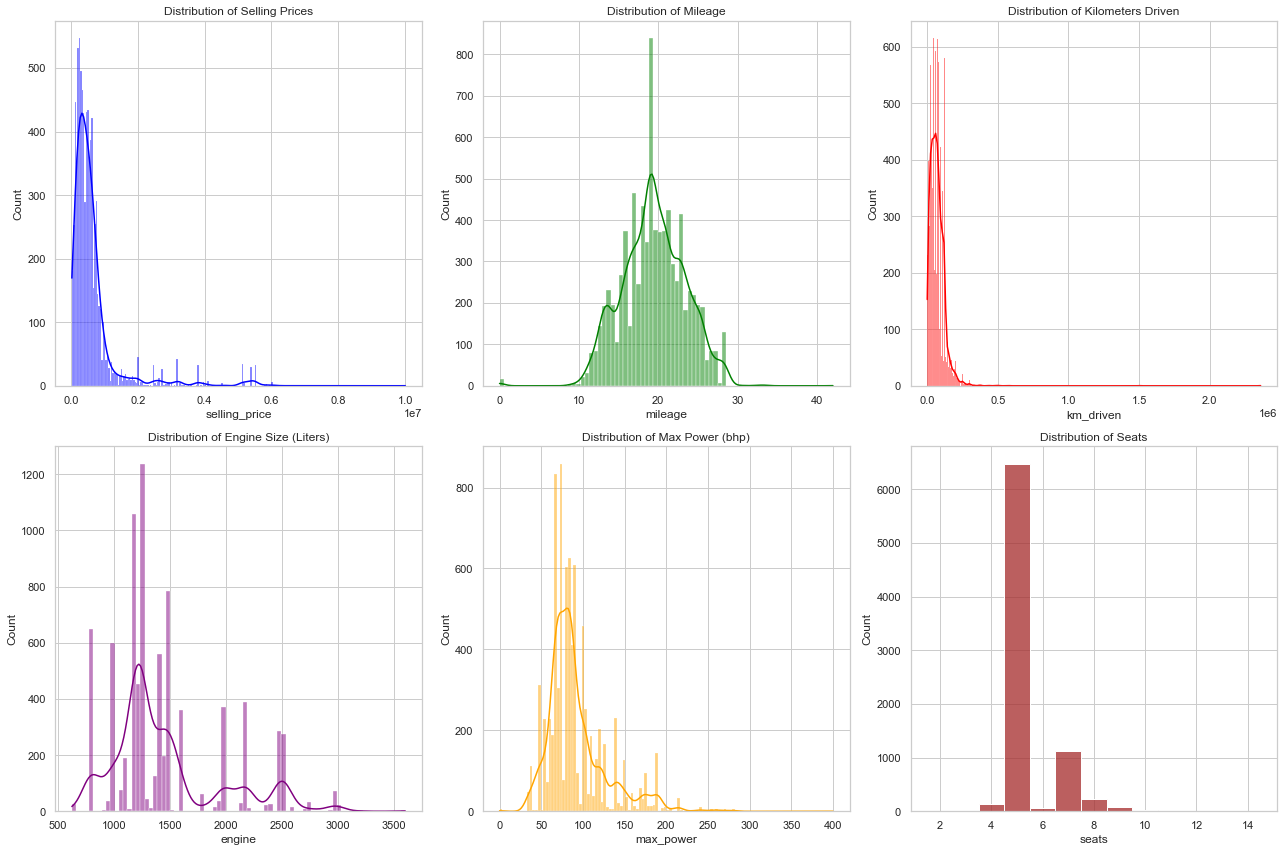

In [13]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for histograms of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the distributions
sns.histplot(data=car_data, x='selling_price', kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Selling Prices')

sns.histplot(data=car_data, x='mileage', kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Mileage')

sns.histplot(data=car_data, x='km_driven', kde=True, ax=axes[0, 2], color='red')
axes[0, 2].set_title('Distribution of Kilometers Driven')

sns.histplot(data=car_data, x='engine', kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Engine Size (Liters)')

sns.histplot(data=car_data, x='max_power', kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Max Power (bhp)')

sns.histplot(data=car_data, x='seats', kde=False, discrete=True, ax=axes[1, 2], color='brown')
axes[1, 2].set_title('Distribution of Seats')

plt.tight_layout()
plt.show()


##### Distribution of Selling Prices: 
The distribution is highly right-skewed, with most cars concentrated at lower selling prices and a long tail extending towards higher values. This indicates that while the majority of cars are relatively affordable, there are some very expensive vehicles as well.

##### Distribution of Mileage: 
This distribution looks roughly normal (bell-shaped), centered around a particular mileage value with fewer cars at the high and low ends of mileage. This suggests that most cars have an average mileage, with fewer cars having exceptionally high or low mileage.

##### Distribution of Kilometers Driven: 
Similar to the selling price, the number of kilometers driven is right-skewed, indicating that most cars have been driven a moderate distance, with a few cars showing significantly higher kilometers on the odometer.

##### Distribution of Engine Size (CC): 
The engine size distribution is also right-skewed, with the majority of cars having smaller engines and fewer cars having large engines.

##### Distribution of Max Power (bhp): 
The maximum power (in brake horsepower) distribution is right-skewed as well, with most cars having lower power and some performance vehicles with much higher power.

##### Distribution of Seats: 
This histogram displays a discrete distribution, with peaks at typical car seat numbers like 5 and 7. The distribution suggests most cars have a standard number of seats, with fewer models featuring a higher number of seats.

### Catplots

#### Transmission vs Selling Price

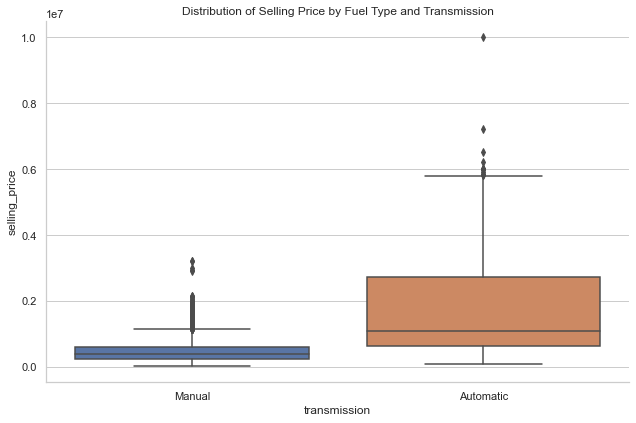

In [14]:
# Create a box plot
sns.catplot(x='transmission', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

##### Manual Transmission Cars:

The median selling price for manual cars is lower than that of automatic cars, indicated by the line within the blue box.
The interquartile range (IQR), which is the box's height, is relatively narrow, suggesting less variability in the selling prices for manual cars compared to automatic cars.
There are several outliers above the upper whisker, indicating that there are a few manual cars with selling prices much higher than the general population of manual cars.

##### Automatic Transmission Cars:

The median selling price is higher, as indicated by the line within the brown box, suggesting that automatic cars tend to be sold at higher prices than manual cars.
The IQR is wider for automatic cars, which indicates a greater variability in the selling prices.
There are outliers present, which are individual automatic cars sold at prices significantly higher than most automatic cars.


The presence of outliers in both categories could suggest that there are luxury or performance cars with both transmission types that are outliers in terms of selling price. This boxplot provides a clear visual representation that automatic cars, on average, have higher selling prices and greater price variability compared to manual cars. This could reflect market preferences, technological advancements, or additional features often present in cars with automatic transmission.

#### Fuel vs Selling Price

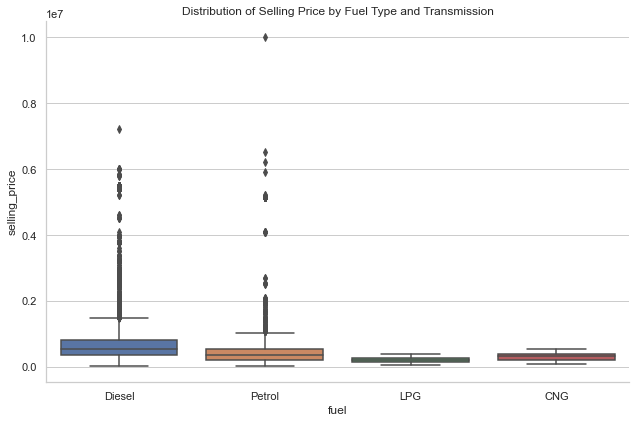

In [15]:
# Create a box plot
sns.catplot(x='fuel', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

1. **Diesel Cars**:
   - The median selling price is located towards the lower end of the IQR (Interquartile Range), suggesting a skew towards higher values.
   - The range of prices is quite broad, indicating significant variability in the selling prices of diesel cars.
   - There are numerous outliers indicating that some diesel cars are sold at much higher prices than the average.


2. **Petrol Cars**:
   - The median selling price is closer to the middle of the IQR, suggesting a more symmetric distribution of prices.
   - The range is narrower than that of diesel cars, indicating less variability in the selling prices of petrol cars.
   - There are outliers, but they are less extreme compared to diesel cars.


3. **LPG and CNG Cars**:
   - The selling prices for LPG and CNG cars are generally lower than for petrol and diesel cars, as indicated by both the lower medians and the more compact IQRs.
   - There are very few to no outliers, which could suggest a more uniform pricing for these types of cars.

Overall, diesel cars seem to have the widest range of selling prices, including the highest outliers, which might indicate a premium market for certain diesel models. Petrol cars have a more moderate price range, and alternative fuel cars like LPG and CNG have the lowest selling prices on average. The data might be suggesting that while there is a market for high-end diesel cars, alternative fuel vehicles are more consistently priced and are on the lower end of the price spectrum. This could reflect market perceptions of performance, reliability, fuel economy, and environmental impact associated with each fuel type.

#### Seller Type vs Selling Price

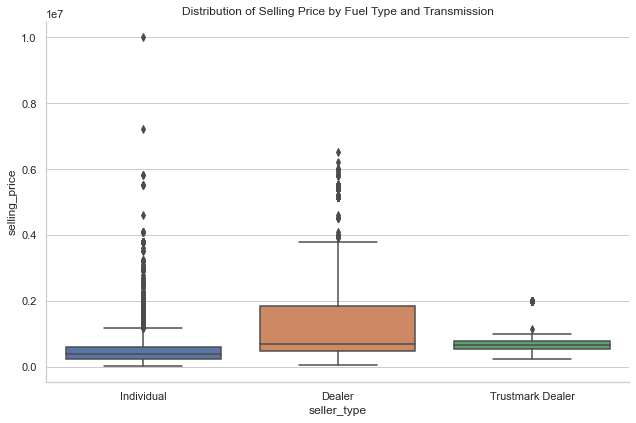

In [16]:
# Create a box plot
sns.catplot(x='seller_type', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

1. **Individual Sellers**:
   - They have the lowest median selling price among the three categories.
   - The interquartile range (IQR) is small, indicating that most of the selling prices from individual sellers are closely grouped around the median.
   - There are several outliers indicating some individuals sell cars at much higher prices than typical.


2. **Dealers**:
   - The median selling price from dealers is higher than that of individual sellers, as shown by the median line in the box.
   - The IQR is larger for dealers than for individual sellers, suggesting a wider variety of selling prices.
   - There are many outliers above the upper whisker, much more so than for individual sellers, which could indicate a selection of premium cars being sold at higher prices.


3. **Trustmark Dealers**:
   - Trustmark Dealers have a median selling price that is similar to or slightly higher than that of regular dealers, but with a much narrower IQR.
   - The range of selling prices is quite compact, which indicates consistency in the prices of cars sold by Trustmark Dealers.
   - There are a few outliers, but not as many as with the regular dealers.

This boxplot demonstrates that, on average, dealers ask for higher prices than individual sellers, with Trustmark Dealers offering a more consistent pricing, likely due to a standardized process or selection of cars with certain guarantees or certifications. The outliers in the dealer category suggest that some dealerships may specialize in higher-end cars, whereas the smaller number of outliers for Trustmark Dealers implies a more selected inventory with an emphasis on quality assurance.

#### Owner vs Selling Price

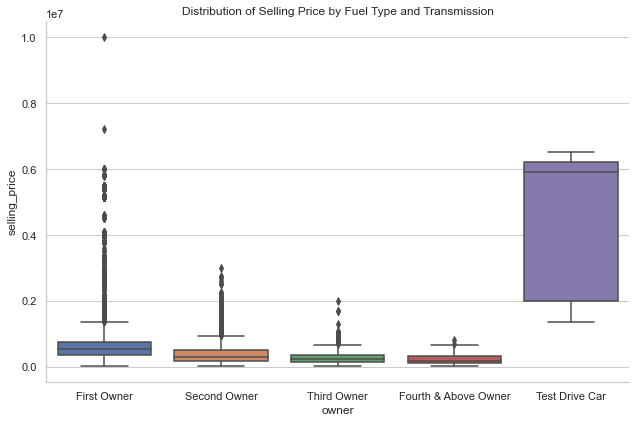

In [17]:
# Create a box plot
sns.catplot(x='owner', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

1. **First Owner**:
   - Cars with a single previous owner have the widest range of selling prices, with the median price being the lowest among all categories.
   - There is a considerable number of outliers indicating that some cars from first owners are sold at much higher prices.
   

2. **Second Owner**:
   - The median selling price for cars with a second owner is higher than that for cars from the first owner.
   - The interquartile range is smaller than for first-owner cars, suggesting less variability in selling prices.


3. **Third Owner**:
   - The median selling price for third-owner cars is lower than that of second-owner cars but higher than that of first-owner cars.
   - The interquartile range is similar to that of second-owner cars.


4. **Fourth & Above Owner**:
   - Cars with four or more previous owners have the lowest median selling price.
   - The range of selling prices is relatively narrow, with few outliers.


5. **Test Drive Car**:
   - These cars have the highest median selling price, which is significantly higher than all other categories.
   - The interquartile range is the largest, indicating a very wide variability in selling prices.
   - This category also has a significant number of outliers, some of which are priced extremely high.

The boxplot indicates that the fewer the number of owners a car has had, the higher its selling price, except for test drive cars, which are likely newer models and have a higher value. It also shows that cars with multiple previous owners tend to have a lower selling price, which could be due to increased wear and tear or perceived reduced value. The high variability and outliers in the test drive car category could reflect premium models or nearly new cars being sold at higher prices.

#### Brand vs Selling Price

In [18]:
# Determine the top 10 most frequent brands
top_brands = car_data['name'].value_counts().nlargest(10).index

# Create a new column that groups all other brands into 'Other'
car_data['brand_name_grouped'] = car_data['name'].apply(lambda x: x if x in top_brands else 'Other')

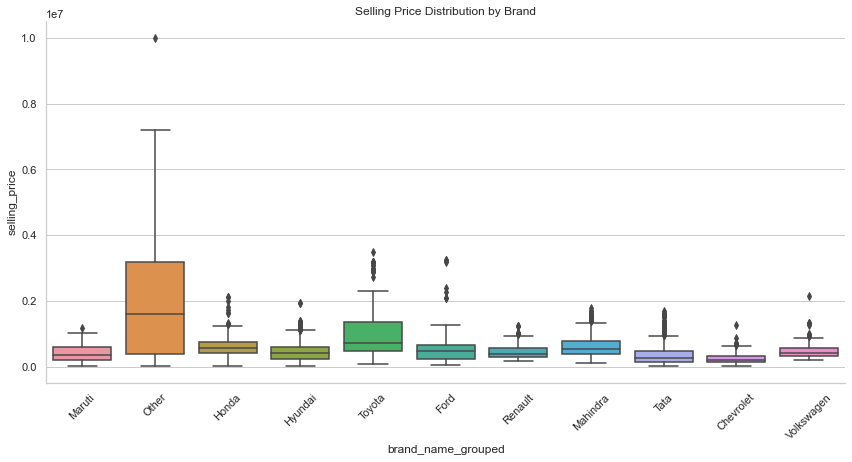

In [19]:
# Create a box plot with Seaborn's catplot
sns.catplot(x='brand_name_grouped', y='selling_price', kind='box', data=car_data, height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.title('Selling Price Distribution by Brand')
plt.show()

1. **General Trends**:
   - Each box represents a brand's spread of selling prices, with the median indicated by the line within the box.
   - The height of the box (the interquartile range or IQR) shows the middle 50% of the data for that brand.
   - Whiskers extend to show the range of the data, excluding outliers, which are plotted as individual points.


2. **Brand Analysis**:
   - Maruti could be a budget brand with a low median selling price and a compact IQR, suggesting less variability in prices.
   - The light blue boxes show brands with moderate median selling prices and relatively narrow IQRs, suggesting consistent pricing.
   - Some brands, like Toyota, have several outliers, indicating that they have some cars that are sold at significantly higher prices than typical for the brand.


This boxplot provides insights into brand value in the marketplace, with certain brands commanding higher selling prices, both in median terms and in terms of high-end outliers. The variation in IQR across brands also gives an idea of the diversity of each brand's car portfolio in terms of pricing. Brands with a larger IQR and more outliers could be offering a wider range of cars from budget to luxury, while brands with a narrow IQR might specialize in a specific market segment.

### Scatterplots

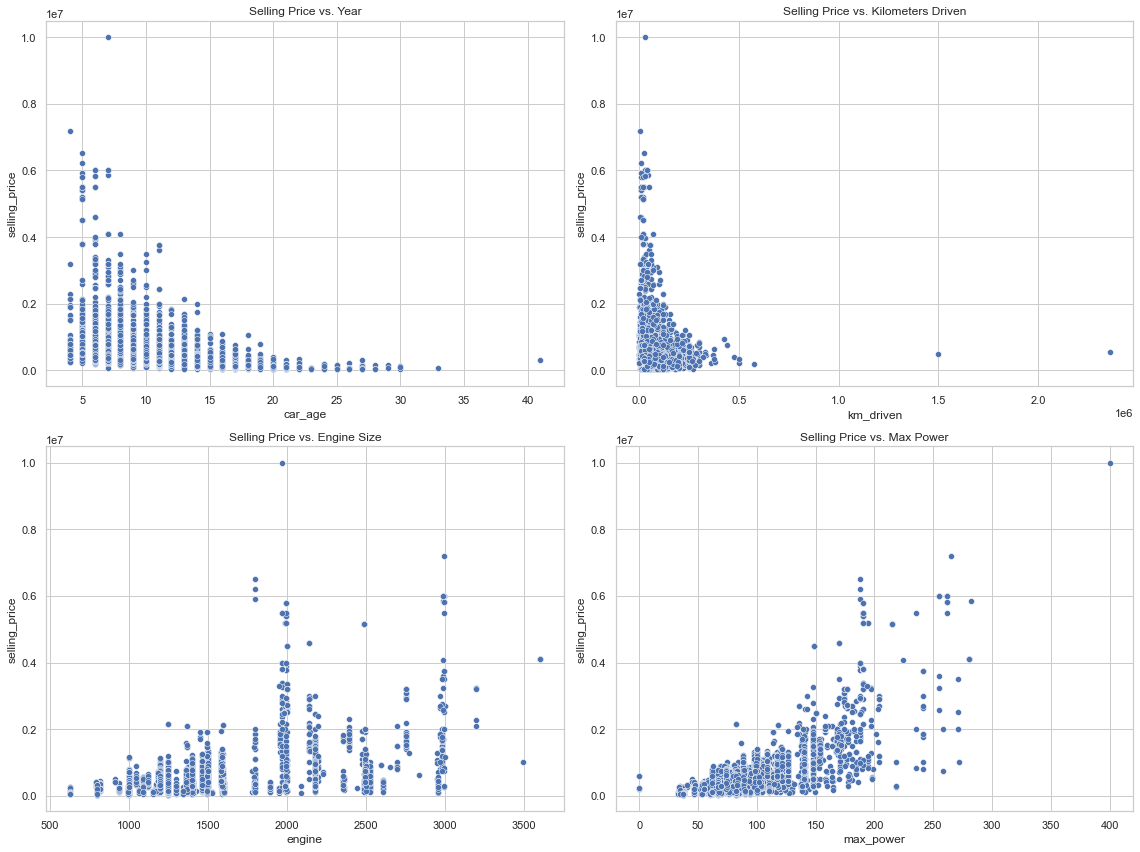

In [20]:
# Creating subplots for scatter plots to examine relationships with selling price
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Relationship between selling price and year
sns.scatterplot(data=car_data, x='car_age', y='selling_price', ax=axes[0, 0])
axes[0, 0].set_title('Selling Price vs. Year')

# Relationship between selling price and kilometers driven
sns.scatterplot(data=car_data, x='km_driven', y='selling_price', ax=axes[0, 1])
axes[0, 1].set_title('Selling Price vs. Kilometers Driven')

# Relationship between selling price and engine size
sns.scatterplot(data=car_data, x='engine', y='selling_price', ax=axes[1, 0])
axes[1, 0].set_title('Selling Price vs. Engine Size')

# Relationship between selling price and max power
sns.scatterplot(data=car_data, x='max_power', y='selling_price', ax=axes[1, 1])
axes[1, 1].set_title('Selling Price vs. Max Power')

plt.tight_layout()
plt.show()

1. **Selling Price vs. Year**:
   - The plot suggests a trend where newer cars (higher year number) generally have higher selling prices, which is expected as newer models tend to have more advanced features and less wear and tear.
   - There is a wide spread in prices for cars from recent years, which could reflect a mix of economy and luxury models.
   

2. **Selling Price vs. Kilometers Driven**:
   - There is a tendency for cars with fewer kilometers driven to have higher selling prices, indicating that less used cars are valued more.
   - The spread becomes quite dense towards the lower kilometers, suggesting a lot of variance in the prices of cars with similar usage.
   

3. **Selling Price vs. Engine Size**:
   - The plot indicates that cars with larger engines can have a higher selling price, which is consistent with the perception that larger engines are often associated with higher performance and possibly premium models.
   - There's a significant amount of scatter, especially for cars with engines around the 2000 CC mark, showing that engine size alone doesn't dictate the selling price.


4. **Selling Price vs. Max Power**:
   - A similar trend to engine size is observed, where cars with higher max power can have higher selling prices.
   - This plot also shows considerable scatter, but there appears to be a slight upward trend, indicating that more powerful cars can demand higher prices.

### Fixing Skewness

In [21]:
# Select only numeric columns and exclude 'mileage' from the list
numeric_data = [column for column in car_data.select_dtypes(include=["int", "float"]) if column != 'mileage']

# Iterate through the list of numeric columns (excluding 'mileage') to calculate and print skewness
for col in numeric_data:
    print("Skewness of", col, "variable is:", car_data[col].skew())

Skewness of selling_price variable is: 4.193533440675855
Skewness of km_driven variable is: 11.170909783549087
Skewness of engine variable is: 1.1753055440141613
Skewness of max_power variable is: 1.6595575154307947
Skewness of seats variable is: 2.015507247545297
Skewness of car_age variable is: 1.072292893616034


In [22]:
# fix skewness  of them with 'log1p' function

for c in numeric_data:
    car_data[c] = np.log1p(car_data[c])

In [23]:
# get skewness of other numeric variables

numeric_data = [column for column in car_data.select_dtypes(["int", "float"])]
for col in numeric_data:
    print("Skewness of", col, "variable is:", car_data[col].skew())

Skewness of selling_price variable is: 0.22327004522860716
Skewness of km_driven variable is: -1.247395727480728
Skewness of mileage variable is: -0.14220847114521287
Skewness of engine variable is: 0.4462500899554945
Skewness of max_power variable is: -1.0068737857581982
Skewness of seats variable is: 1.6923972129414968
Skewness of car_age variable is: 0.18426408315220322


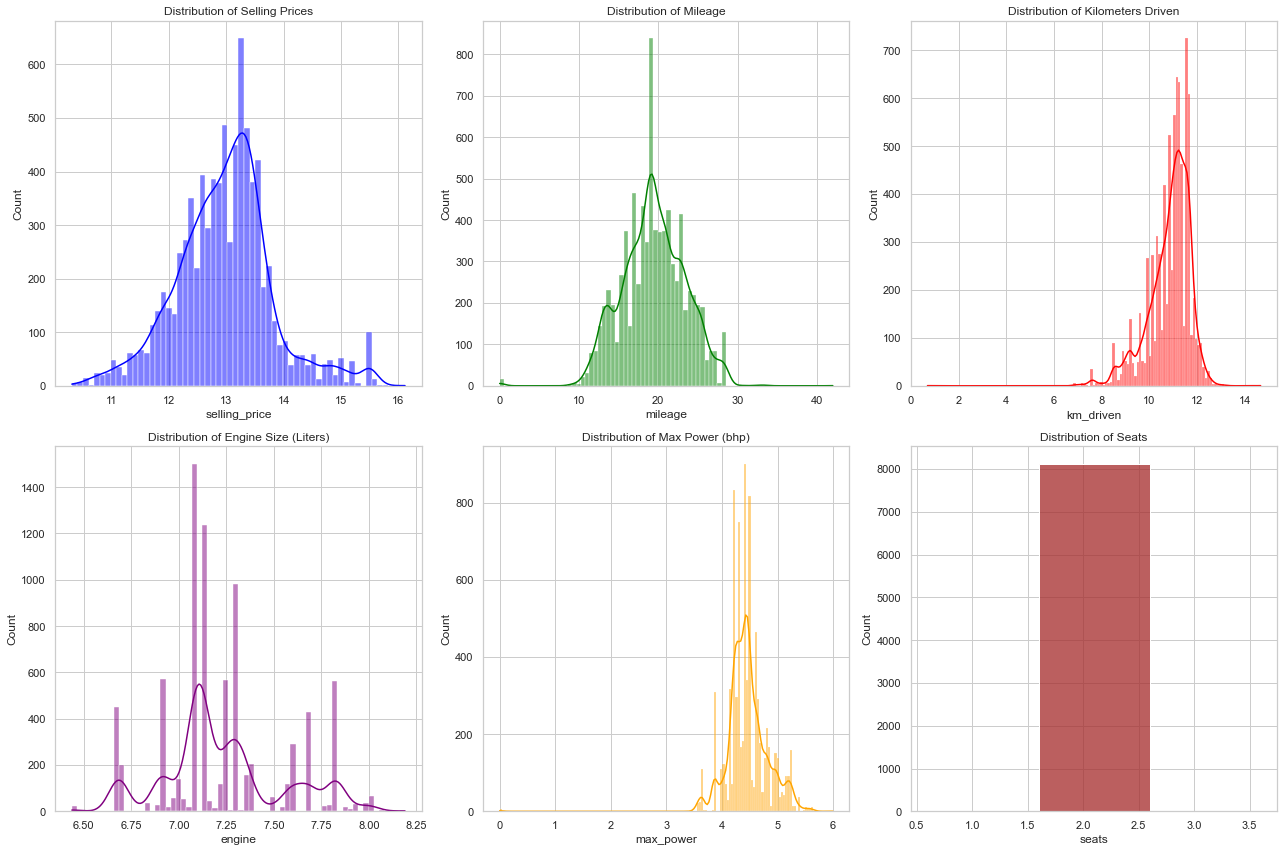

In [24]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for histograms of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the distributions
sns.histplot(data=car_data, x='selling_price', kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Selling Prices')

sns.histplot(data=car_data, x='mileage', kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Mileage')

sns.histplot(data=car_data, x='km_driven', kde=True, ax=axes[0, 2], color='red')
axes[0, 2].set_title('Distribution of Kilometers Driven')

sns.histplot(data=car_data, x='engine', kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Engine Size (Liters)')

sns.histplot(data=car_data, x='max_power', kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Max Power (bhp)')

sns.histplot(data=car_data, x='seats', kde=False, discrete=True, ax=axes[1, 2], color='brown')
axes[1, 2].set_title('Distribution of Seats')

plt.tight_layout()
plt.show()

## Machine Learning Models and Implementation

In [25]:
# select dependent variable (label)

y = car_data["selling_price"]

# select independent variable (estimator)

x = car_data.drop("selling_price", axis = 1)

# encode the variables of the dataset

x = pd.get_dummies(x, drop_first = True)

In [26]:
# Split the dataset into x_train (y_train) and x_test (y_test) sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

Scale features using statistics that are robust to outliers. RobustScaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). 

In [27]:
# Scale features

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
rob_scaler.fit(x_train)
x_train = rob_scaler.transform(x_train)
x_test = rob_scaler.transform(x_test)

#### Define cross validation metrics and setup kfold

In [28]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 10, random_state = 11, shuffle = True)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

def cv_rmse(model, X, y, k_fold):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=k_fold)
    rmse = np.sqrt(-scores)
    return np.mean(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred))


### Elastic Net Model

Mean Absolute Error: 0.21546836577735043
Mean Squared Error: 0.08335236162266364
Root Mean Squared Error: 0.28870809067752784
R-squared: 0.8735252746281047


Text(0, 0.5, 'prediction')

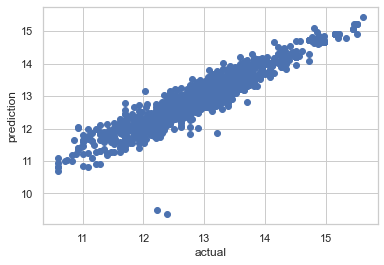

In [30]:
from sklearn.linear_model import ElasticNetCV

elastic_net = ElasticNetCV(alphas=[0.01, 0.1, 1, 10, 100], l1_ratio=[0.1, 0.5, 0.9], cv=k_fold, random_state=1)

elastic_net.fit(x_train, y_train)

best_alpha = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_

y_pred = elastic_net.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred);
plt.xlabel("actual")
plt.ylabel("prediction")

#### ELASTIC NET Evaluation

The output shows relatively low MAE and MSE values, indicating that the model has a good fit. The RMSE, being the square root of MSE, is also low.

The R² value is approximately 0.87, which means that around 87% of the variability in the dependent variable can be explained by the model. This is typically considered a high R² value, suggesting that the model has captured most of the explanatory information in the data.

Scatter Plot:

A scatter plot is generated to visually compare the actual values (y_test) and the predictions (y_pred).
Ideally, if predictions were perfect, the points would lie on the line y = x

The scatter plot suggests that there is a good agreement between the actual and predicted values, especially in the middle range of the data. However, there may be some variance at the lower and upper ends.

### XGBoost Model

Mean Absolute Error: 0.1453792163094942
Mean Squared Error: 0.048040985641470135
Root Mean Squared Error: 0.21918253954517028
R-squared: 0.927104999218786


Text(0, 0.5, 'prediction')

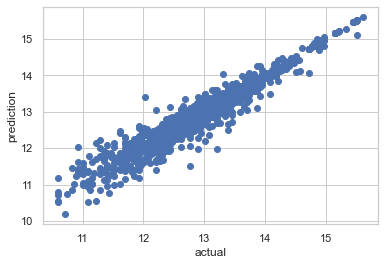

In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000, random_state = 1)

xgb.fit(x_train, y_train)

y_pred2 = xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred2);
plt.xlabel("actual")
plt.ylabel("prediction")

#### XGBoost Evaluation

The output of the model evaluation shows:

MAE (Mean Absolute Error): About 0.1465, which is relatively low, suggesting good predictive performance.

MSE (Mean Squared Error): Approximately 0.0482, indicating that the predictions are, on average, quite close to the actual values.

RMSE (Root Mean Squared Error): About 0.2197, which is the square root of MSE, provides an error estimate in the same units as the predicted value.

R² (R-squared): Around 0.9267, a very high value, suggests that the model explains most of the variability in the response variable and has a strong fit to the data.

Scatter Plot:

The points appear to be closely clustered along a line, which indicates a strong agreement between predicted and actual values. This visual evidence supports the high R² value.

In comparison with the previous model, the XGBoost model has a slightly better level of performance, considering the R² values are both high (previous was ~0.87, and XGBoost is ~0.93).

### RandomForest Regressor

Mean Absolute Error: 0.1402989398695297
Mean Squared Error: 0.043995065735177856
Root Mean Squared Error: 0.2097500077119852
R-squared: 0.933244076733368


Text(0, 0.5, 'prediction')

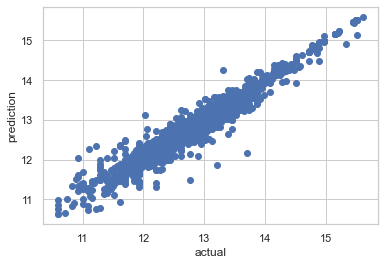

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

rf.fit(x_train, y_train)

y_pred3 = rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred3);
plt.xlabel("actual")
plt.ylabel("prediction")

#### Random Forest Evaluation

The output indicates the model has achieved:

MAE of approximately 0.1429, which is a low error, indicating good predictive accuracy.

MSE of approximately 0.0439, which is also relatively low, suggesting that the model's predictions are close to the actual values.

RMSE of approximately 0.2096, which is comparable to the earlier models (ElasticNet and XGBoost), hinting at a good fit to the data.

R² of approximately 0.9332, which is a very high value, showing that the model explains a large portion of the variance in the response variable.

Scatter Plot:

The plot shows a strong linear relationship between actual and predicted values, with the points densely packed along an invisible line of perfect prediction, indicating the model has performed well.

The RandomForestRegressor has shown a high level of performance, comparable to the XGBoost model seen in the previous image. Both models have R² values over 0.9, which suggests they are capturing the underlying patterns in the data effectively. The scatter plot reaffirms the high R² value, with the actual and predicted values closely aligned.

### GradientBoosting Regressor

Mean Absolute Error: 0.14280675589831884
Mean Squared Error: 0.042051332459832655
Root Mean Squared Error: 0.2050642154541661
R-squared: 0.9361934008725974


Text(0, 0.5, 'prediction')

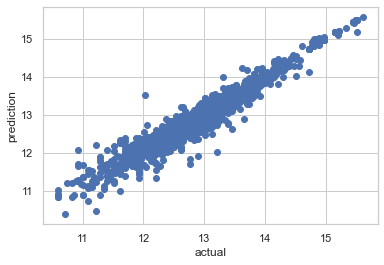

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 11)
gbr.fit(x_train, y_train)

y_pred4 = gbr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred4)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred4);
plt.xlabel("actual")
plt.ylabel("prediction")

#### Gradient Boosting Evaluation

The printed output shows the performance of the model:

MAE: Approximately 0.1428, which is similar to the previous models and indicates good accuracy.

MSE: Approximately 0.0420, suggesting that the predictions are close to the true values.

RMSE: Around 0.2050, indicating the typical error in the prediction of the test set.

R²: Around 0.9361, which is a high score, demonstrating that the model explains a large portion of the variance in 
the dependent variable.

Scatter Plot:

The distribution of points in the scatter plot shows a strong positive relationship, with the data points closely hugging an invisible line that represents a perfect prediction.

## RESULT

Among these models, the **GradientBoosting Model** exhibits the **best overall performance**.

It has the highest R-squared value (0.936), indicating it explains about 93.6% of the variance in car prices, which is superior compared to the other models.

It also shows the lowest values in MSE and RMSE, suggesting that its predictions are closest to the actual data points.

The MAE is slightly higher than the Random Forest model but still lower than the XGBoost and Elastic Net Models.


### Randomised Input/ Output

In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def predict_and_evaluate(car_data):

    # Splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, random_state=1)

    # Making a copy of x_test before scaling for later use in generating sample inputs
    x_test_copy = x_test.copy()

    # Scaling
    rob_scaler = RobustScaler()
    rob_scaler.fit(x_train)
    x_train_scaled = rob_scaler.transform(x_train)
    x_test_scaled = rob_scaler.transform(x_test)

    # Model Training
    gbr = GradientBoostingRegressor(n_estimators=1000, random_state=11)
    gbr.fit(x_train_scaled, y_train)

    # Predicting
    y_pred = gbr.predict(x_test_scaled)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Generate a sample input and output
    sample_index = np.random.randint(0, len(x_test))
    sample_input = x_test_copy.iloc[sample_index].to_frame().T

    # Filter out zero values for better visibility
    sample_input_filtered = sample_input.loc[:, (sample_input != 0).any(axis=0)]

    sample_scaled_input = rob_scaler.transform(sample_input)
    sample_prediction = gbr.predict(sample_scaled_input)

    # Unlogging prices (if needed)
    predicted_price = np.expm1(sample_prediction[0])  # Adjust if prices were logged
    actual_price = np.expm1(y_test.iloc[sample_index])  # Adjust if prices were logged

    # Displaying the sample input in a table
    print("Sample Input (Original Features):")
    display(sample_input_filtered)

    # Displaying Predicted vs Actual Selling Price
    print("\nPredicted Selling Price: {:.2f}".format(predicted_price))
    print("Actual Selling Price: {:.2f}".format(actual_price))

    # Print evaluation metrics
    print("\nEvaluation Metrics:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

In [35]:
predict_and_evaluate(car_data)

Sample Input (Original Features):


,km_driven,mileage,engine,max_power,seats,car_age,name_Hyundai,fuel_Diesel,seller_type_Individual,transmission_Manual,owner_Second Owner,brand_name_grouped_Hyundai
2879,11.326608,22.54,7.242082,4.496805,1.791759,2.397895,1.0,1.0,1.0,1.0,1.0,1.0



Predicted Selling Price: 465031.27
Actual Selling Price: 475000.00

Evaluation Metrics:
Mean Absolute Error: 0.1428
Mean Squared Error: 0.0421
Root Mean Squared Error: 0.2051
R-squared: 0.9362
